# Métriques — Classification, Régression, Segmentation

Ce notebook génère des **datasets synthétiques** et calcule les métriques suivantes :

## Classification
- Accuracy
- Precision
- Recall (sensibilité)
- F1-score
- AUC-ROC
- Matrice de confusion

## Régression
- MAE
- MSE
- RMSE
- MAPE
- Percentage error (MPE : mean percentage error)

## Segmentation (multi-classes)
- IoU
- Dice score
- Pixel accuracy
- Mean IoU
- Recall par classe
- Precision par classe


In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay,
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression, LinearRegression

RNG = np.random.default_rng(42)
np.random.seed(42)

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["figure.dpi"] = 120


## 1) Classification (dataset synthétique)

On crée un problème binaire, on entraîne une **régression logistique**, puis on calcule :
accuracy, precision, recall, F1, AUC-ROC, matrice de confusion.


Classification dataset
X shape: (1500, 10) | y shape: (1500,) | classes: [896 604]


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,-0.620512,2.920519,0.126322,0.953170,-2.766490,-0.445549,0.843307,-0.209180,-0.899367,2.709778,1
1,1.140188,0.257986,-0.499020,-1.214889,-0.375024,0.039007,1.533069,-0.451892,-0.065454,0.236871,0
2,1.604756,2.462691,-2.413185,-4.665710,1.805591,-5.262945,0.447163,-0.545553,1.182517,-3.205316,0
3,2.909814,-1.329936,-0.434896,-1.377433,-1.164972,0.739146,1.168585,-0.601355,0.806643,1.012795,1
4,1.942678,3.548860,-1.371796,-3.289370,-2.393470,1.641255,0.258092,-0.397992,-0.542510,2.407901,1


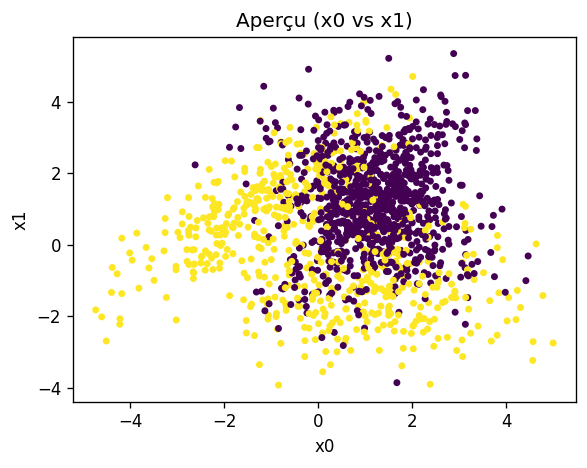

Accuracy   : 0.8827
Precision  : 0.8690
Recall     : 0.8344
F1-score   : 0.8514
AUC-ROC    : 0.9529


In [45]:
# Dataset de classification
Xc, yc = make_classification(
    n_samples=1500,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_clusters_per_class=2,
    class_sep=1.2,
    weights=[0.6, 0.4],
    flip_y=0.02,
    random_state=42,
)

# Aperçu du dataset
print("Classification dataset")
print(f"X shape: {Xc.shape} | y shape: {yc.shape} | classes: {np.bincount(yc)}")

df_c = pd.DataFrame(Xc, columns=[f"x{i}" for i in range(Xc.shape[1])])
df_c["y"] = yc

display(df_c.head())

plt.figure(figsize=(5, 4))
plt.scatter(df_c["x0"], df_c["x1"], c=df_c["y"], s=10)
plt.title("Aperçu (x0 vs x1)")
plt.xlabel("x0")
plt.ylabel("x1")
plt.tight_layout()
plt.show()

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.25, random_state=42, stratify=yc
)

clf = LogisticRegression(max_iter=2000)
clf.fit(Xc_train, yc_train)

yc_pred = clf.predict(Xc_test)
yc_proba = clf.predict_proba(Xc_test)[:, 1]

# Métriques de classification
acc = accuracy_score(yc_test, yc_pred)
prec = precision_score(yc_test, yc_pred)
rec = recall_score(yc_test, yc_pred)
f1 = f1_score(yc_test, yc_pred)
auc = roc_auc_score(yc_test, yc_proba)

print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {prec:.4f}")
print(f"Recall     : {rec:.4f}")
print(f"F1-score   : {f1:.4f}")
print(f"AUC-ROC    : {auc:.4f}")


## 2) Régression (dataset synthétique)

On crée un problème de régression, on entraîne une **régression linéaire**, puis on calcule :
MAE, MSE, RMSE, MAPE, et l’erreur en pourcentage (percentage error / MPE).


Regression dataset
X shape: (1500, 8) | y shape: (1500,)


,x0,x1,x2,x3,x4,x5,x6,x7,y
0,0.060785,0.081277,1.926286,-0.742328,-0.311676,-0.435077,1.178843,-1.329008,606.354508
1,0.169361,-0.111226,-1.413714,0.609138,1.236093,-0.735530,-0.903908,1.091310,487.626998
2,-0.998307,0.863528,0.518793,-1.170281,-1.217404,1.152648,0.171469,0.467950,619.096739
3,-1.607661,2.023606,0.184741,1.372848,-0.357445,-0.190039,0.006800,-0.180392,552.885177
4,-0.821681,-0.527701,1.623529,-0.968129,-2.001706,-0.450740,-1.127286,-0.651287,411.977042


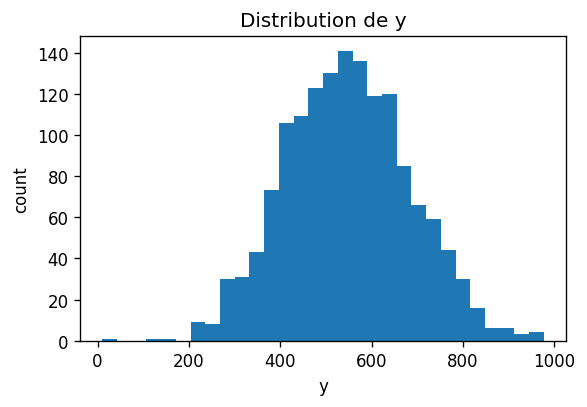

MAE   : 13.3063
MSE   : 283.5811
RMSE  : 16.8399
MAPE  : 2.64%
MPE   : 0.43%


In [46]:
# Dataset de régression
Xr, yr = make_regression(
    n_samples=1500,
    n_features=8,
    n_informative=6,
    noise=18.0,
    random_state=42,
)

# Pour éviter les divisions par ~0 (et les effets de signe) dans les erreurs en %,
# on décale la cible pour qu'elle soit strictement positive.
yr = yr - float(yr.min()) + 10.0

# Aperçu du dataset
print("Regression dataset")
print(f"X shape: {Xr.shape} | y shape: {yr.shape}")

df_r = pd.DataFrame(Xr, columns=[f"x{i}" for i in range(Xr.shape[1])])
df_r["y"] = yr

display(df_r.head())

plt.figure(figsize=(5, 3.5))
plt.hist(df_r["y"], bins=30)
plt.title("Distribution de y")
plt.xlabel("y")
plt.ylabel("count")
plt.tight_layout()
plt.show()

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.25, random_state=42
)

reg = LinearRegression()
reg.fit(Xr_train, yr_train)

yr_pred = reg.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(yr_test, yr_pred)  # en fraction (0.10 = 10%)

# Percentage error (par point) et MPE (mean percentage error)
percentage_error = (yr_pred - yr_test) / yr_test  # fraction
mpe = float(np.mean(percentage_error))

print(f"MAE   : {mae:.4f}")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"MAPE  : {mape*100:.2f}%")
print(f"MPE   : {mpe*100:.2f}%")

## 3) Segmentation (dataset synthétique)

Ici on simule une segmentation **multi-classes** sur des masques $H\times W$.
On calcule : IoU, Dice, pixel accuracy, mean IoU, recall/precision par classe.


In [47]:
def _safe_div(num: np.ndarray, den: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    return num / (den + eps)


def segmentation_metrics(y_true: np.ndarray, y_pred: np.ndarray, n_classes: int):
    """Calcule des métriques de segmentation multi-classes.

    y_true, y_pred: tableaux int de forme (N, H, W) avec valeurs dans [0, n_classes-1].
    """
    y_true_f = y_true.reshape(-1)
    y_pred_f = y_pred.reshape(-1)

    # matrice de confusion au niveau pixel (KxK)
    cm_pix = np.zeros((n_classes, n_classes), dtype=np.int64)
    for t, p in zip(y_true_f, y_pred_f):
        cm_pix[t, p] += 1

    tp = np.diag(cm_pix).astype(np.float64)
    fp = cm_pix.sum(axis=0).astype(np.float64) - tp
    fn = cm_pix.sum(axis=1).astype(np.float64) - tp

    precision_per_class = _safe_div(tp, tp + fp)
    recall_per_class = _safe_div(tp, tp + fn)

    # IoU_k = TP / (TP+FP+FN)
    iou_per_class = _safe_div(tp, tp + fp + fn)

    # Dice_k = 2TP / (2TP + FP + FN)
    dice_per_class = _safe_div(2 * tp, 2 * tp + fp + fn)

    pixel_acc = float(tp.sum() / cm_pix.sum())
    mean_iou = float(np.mean(iou_per_class))
    mean_dice = float(np.mean(dice_per_class))

    return {
        "pixel_accuracy": pixel_acc,
        "mean_iou": mean_iou,
        "mean_dice": mean_dice,
        "iou_per_class": iou_per_class,
        "dice_per_class": dice_per_class,
        "precision_per_class": precision_per_class,
        "recall_per_class": recall_per_class,
        "confusion_pixels": cm_pix,
    }


# Génération de masques synthétiques
N, H, W = 20, 64, 64
K = 4

# On crée des masques de vérité terrain en blocs (plus réalistes qu’un pur bruit)
y_true = np.zeros((N, H, W), dtype=np.int64)
for i in range(N):
    mask = np.zeros((H, W), dtype=np.int64)
    for cls in range(1, K):
        x0 = RNG.integers(0, W // 2)
        y0 = RNG.integers(0, H // 2)
        x1 = RNG.integers(W // 2, W)
        y1 = RNG.integers(H // 2, H)
        mask[y0:y1, x0:x1] = cls
    y_true[i] = mask

# "Images d'origine" (inputs) synthétiques : couleur selon la classe + bruit
palette = np.array(
    [
        [0.10, 0.10, 0.10],  # classe 0
        [0.20, 0.50, 0.90],  # classe 1
        [0.30, 0.80, 0.40],  # classe 2
        [0.95, 0.85, 0.20],  # classe 3
    ],
    dtype=np.float32,
)

X_img = palette[y_true]  # (N,H,W,3)
X_img = np.clip(X_img + RNG.normal(0, 0.05, size=X_img.shape), 0, 1)

print("Segmentation dataset")
print(f"X_img shape: {X_img.shape} | y_true shape: {y_true.shape} | classes: {K}")

# Prédictions : on copie puis on injecte du bruit de labels
y_pred = y_true.copy()
noise_rate = 0.12
noise = RNG.random((N, H, W)) < noise_rate
random_labels = RNG.integers(0, K, size=(N, H, W))
y_pred[noise] = random_labels[noise]

# Métriques
m = segmentation_metrics(y_true, y_pred, n_classes=K)

print(f"Pixel accuracy : {m['pixel_accuracy']:.4f}")
print(f"Mean IoU       : {m['mean_iou']:.4f}")
print(f"Mean Dice      : {m['mean_dice']:.4f}")

seg_df = pd.DataFrame(
    {
        "class": list(range(K)),
        "IoU": m["iou_per_class"],
        "Dice": m["dice_per_class"],
        "Precision": m["precision_per_class"],
        "Recall": m["recall_per_class"],
    }
)
seg_df


Segmentation dataset
X_img shape: (20, 64, 64, 3) | y_true shape: (20, 64, 64) | classes: 4
Pixel accuracy : 0.9091
Mean IoU       : 0.7933
Mean Dice      : 0.8828


,class,IoU,Dice,Precision,Recall
0,0,0.884663,0.938802,0.970046,0.909508
1,1,0.695835,0.820640,0.749254,0.907061
2,2,0.751688,0.858244,0.812611,0.909307
3,3,0.840890,0.913569,0.918104,0.909079


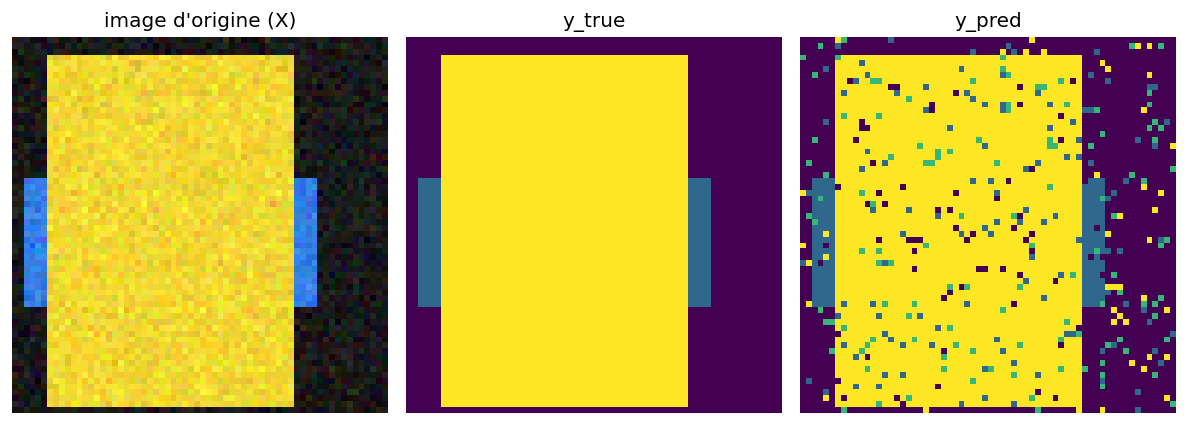

In [48]:
# Visualisation rapide (1 exemple)
idx = 0

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(X_img[idx])
axes[0].set_title("image d'origine (X)")
axes[0].axis("off")

axes[1].imshow(y_true[idx], vmin=0, vmax=K - 1)
axes[1].set_title("y_true")
axes[1].axis("off")

axes[2].imshow(y_pred[idx], vmin=0, vmax=K - 1)
axes[2].set_title("y_pred")
axes[2].axis("off")

plt.tight_layout()
plt.show()
